# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6 syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks. 

9. You may discuss broad ideas with friends, but all code must be written by yourself.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names.

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. Plotting the data and prediction is highly encouraged for debugging. But remove debugging/understanding code before submitting.


In [1]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt


**Cell type : TextRead**

# Problem 1: Learning Binary Bayes Classifiers from data with Max. Likelihood 

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. 

1a) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, I)$ and  $X|Y=1 \sim \mathcal{N}(\mu_+, I)$. *(Same known covariance)*

1b) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma)$ *(Same unknown covariance)*

1c) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma_-)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma_+)$ *(different unknown covariance)*




In [ ]:
# Cell type : CodeWrite

def Bayes1a(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    X_neg = X_train[ Y_train == -1,:]
    X_pos = X_train[ Y_train == +1,:]
    
    mu_neg = np.mean(X_neg, axis=0)
    mu_pos = np.mean(X_pos, axis=0)
    
    prior_neg = X_neg.shape[0]/X_train.shape[0]
    prior_pos = X_pos.shape[0]/X_train.shape[0]
    
    #spl 2 class 0-1 loss, discriminant func: g(x) = g_-ve(x) - g_+ve(x) >= 0 then classify x as -ve class
    g_Xtest = (1./2.)*np.sum((X_test - mu_pos)**2,axis=1) - \
              (1./2.)*np.sum((X_test - mu_neg)**2,axis=1) + \
              np.log(prior_neg/ prior_pos)
    
    Y_test_pred = np.zeros(g_Xtest.shape[0])
    Y_test_pred[g_Xtest > 0] =  -1.
    Y_test_pred[g_Xtest <= 0] = 1 
    
    return Y_test_pred
    
    
    
def Bayes1b(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    X_neg = X_train[ Y_train == -1,:]
    X_pos = X_train[ Y_train == +1,:]
    
    
    mu_neg = np.mean(X_neg, axis=0)
    mu_pos = np.mean(X_pos, axis=0)
    
    prior_neg = X_neg.shape[0]/X_train.shape[0]
    prior_pos = X_pos.shape[0]/X_train.shape[0]
    
    comm_cov = np.cov(X_train.T)
    
    inv_cov = np.linalg.inv(comm_cov)
    
    discri_neg = (-1/2)*np.dot(np.dot((X_test - mu_neg),inv_cov), (X_test - mu_neg).T)
    discri_neg = np.diag(discri_neg)
    discri_neg = discri_neg + np.log(prior_neg)
    
    discri_pos = (-1/2)*np.dot(np.dot((X_test - mu_pos),inv_cov), (X_test - mu_pos).T)
    discri_pos = np.diag(discri_pos)
    discri_pos = discri_pos + np.log(prior_pos)
    
    #classifiy to class -1 if discri_neg > discri_pos
    Y_test_pred = np.zeros(X_test.shape[0])
    
    Y_test_pred[discri_neg > discri_pos] = -1
    Y_test_pred[discri_neg <= discri_pos] = +1
    
    return Y_test_pred
    
def Bayes1c(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    X_neg = X_train[ Y_train == -1,:]
    X_pos = X_train[ Y_train == +1,:]
    
    
    mu_neg = np.mean(X_neg, axis=0)
    mu_pos = np.mean(X_pos, axis=0)
    
    prior_neg = X_neg.shape[0]/X_train.shape[0]
    prior_pos = X_pos.shape[0]/X_train.shape[0]

    cov_neg = np.cov(X_neg.T)
    cov_pos = np.cov(X_pos.T)
    
    inv_cov_neg = np.linalg.inv(cov_neg)
    inv_cov_pos = np.linalg.inv(cov_pos)
    
    discri_neg = (-1/2)*np.dot(np.dot((X_test - mu_neg),inv_cov_neg), (X_test - mu_neg).T)
    discri_neg = np.diag(discri_neg)
    discri_neg = discri_neg + np.log(prior_neg) - (1./2.) * np.log(np.linalg.det(cov_neg))
    
    discri_pos = (-1/2)*np.dot(np.dot((X_test - mu_pos),inv_cov_pos), (X_test - mu_pos).T)
    discri_pos = np.diag(discri_pos)
    discri_pos = discri_pos + np.log(prior_pos) - (1./2.) * np.log(np.linalg.det(cov_pos))
    
    #classifiy to class -1 if discri_neg > discri_pos
    Y_test_pred = np.zeros(X_test.shape[0])
    
    Y_test_pred[discri_neg > discri_pos] = -1
    Y_test_pred[discri_neg <= discri_pos] = +1
    
    return Y_test_pred
        


In [ ]:
# Cell type : Convenience

# Testing the functions above

# To TAs: Replace this cell with the testing cell developed.

# To students: You may use the example here for testing syntax issues 
# with your functions, and also as a sanity check. But the final evaluation
# will be done for different inputs to the functions. (So you can't just 
# solve the problem for this one example given below.) 


X_train_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_train_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_train = np.concatenate((X_train_pos, X_train_neg), axis=0)
Y_train = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))
X_test_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_test_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_test = np.concatenate((X_test_pos, X_test_neg), axis=0)
Y_test = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))

Y_pred_test_1a = Bayes1a(X_train, Y_train, X_test)
Y_pred_test_1b = Bayes1b(X_train, Y_train, X_test)
Y_pred_test_1c = Bayes1c(X_train, Y_train, X_test)




**Cell type : TextRead**

# Problem 1

1d) Run the above three algorithms (Bayes1a,1b and 1c), for the three datasets given (dataset1_1.npz, dataset1_2.npz, dataset1_3.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 3 datasets = 9 plots) on a 2d plot (color the positively classified area light green, and negatively classified area light red). Add the training data points also on the plot. Plots to be organised into 3 plots follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 9 plots appropriately. 

In the next Textwrite cell, summarise (use the plots of the data and the assumptions in the problem to explain) your observations regarding the six learnt classifiers, and also give the error rate of the three classifiers on the three datasets as 3x3 table, with appropriately named rows and columns.


In [ ]:
# # Cell type : CodeWrite
# # write the code for loading the data, running the three algos, and plotting here. 
# # (Use the functions written previously.)
datasets_1a = np.array(['dataset1_1', 'dataset1_2', 'dataset1_3'])

fig = plt.subplots(nrows=3, ncols=3,figsize=(20,20))
plots_pos = np.array([331,334,337])
for i in range(datasets_1a.shape[0]):
    X_train = np.load(file='Archive/'+ datasets_1a[i] +'/arr_0.npy')
    Y_train = np.load(file='Archive/'+ datasets_1a[i] +'/arr_1.npy')

    X_test = np.load(file='Archive/'+ datasets_1a[i] +'/arr_2.npy')
    Y_test = np.load(file='Archive/'+ datasets_1a[i] +'/arr_3.npy')

    Y_pred_test_1a = Bayes1a(X_train, Y_train, X_test)
    #print('bayes1a test accuracy:', np.count_nonzero(Y_test == Y_pred_test_1a)/X_test.shape[0])
    
    error_rate = 1-0 - np.count_nonzero(Y_test == Y_pred_test_1a)/X_test.shape[0]

    ax1 = plt.subplot(plots_pos[i])
    plt.title('bayes1a ' + datasets_1a[i] +', error=' + str(error_rate))
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))
    x1_x2points = np.array(np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))).T.reshape(-1,2)
    Y_pred_area = Bayes1a(X_train, Y_train, x1_x2points)
    ax1.scatter(x1_x2points[Y_pred_area == -1][:,0], x1_x2points[Y_pred_area == -1][:,1],
                    alpha=0.2, color='r', marker='.')
    ax1.scatter(x1_x2points[Y_pred_area == 1][:,0], x1_x2points[Y_pred_area == 1][:,1], 
                    alpha=0.2, color='g', marker='.')


    

    ax1.scatter(X_train[Y_train == -1][:,0], X_train[Y_train == -1][:,1],
                    alpha=0.2, color='r', marker='o', label='neg')
    ax1.scatter(X_train[Y_train == 1][:,0], X_train[Y_train == 1][:,1], 
                    alpha=0.2, color='g', marker='o', label='pos')
    ax1.legend(loc='upper left')
    
# *********************plots for bayes 1b******************

plots_pos = np.array([332,335,338])

for i in range(datasets_1a.shape[0]):
    X_train = np.load(file='Archive/'+ datasets_1a[i] +'/arr_0.npy')
    Y_train = np.load(file='Archive/'+ datasets_1a[i] +'/arr_1.npy')

    X_test = np.load(file='Archive/'+ datasets_1a[i] +'/arr_2.npy')
    Y_test = np.load(file='Archive/'+ datasets_1a[i] +'/arr_3.npy')

    Y_pred_test_1a = Bayes1b(X_train, Y_train, X_test)
    #print('bayes1a test accuracy:', np.count_nonzero(Y_test == Y_pred_test_1a)/X_test.shape[0])
    
    error_rate = 1-0 - np.count_nonzero(Y_test == Y_pred_test_1a)/X_test.shape[0]

    ax1 = plt.subplot(plots_pos[i])
    plt.title('bayes1b ' + datasets_1a[i] +', error=' + str(error_rate))
    
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))
    x1_x2points = np.array(np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))).T.reshape(-1,2)
    Y_pred_area = Bayes1b(X_train, Y_train, x1_x2points)
    ax1.scatter(x1_x2points[Y_pred_area == -1][:,0], x1_x2points[Y_pred_area == -1][:,1],
                    alpha=0.2, color='r', marker='.')
    ax1.scatter(x1_x2points[Y_pred_area == 1][:,0], x1_x2points[Y_pred_area == 1][:,1], 
                    alpha=0.2, color='g', marker='.')


    

    ax1.scatter(X_train[Y_train == -1][:,0], X_train[Y_train == -1][:,1],
                    alpha=0.2, color='r', marker='o', label='neg')
    ax1.scatter(X_train[Y_train == 1][:,0], X_train[Y_train == 1][:,1], 
                    alpha=0.2, color='g', marker='o', label='pos')
    ax1.legend(loc='upper left')

# plt.show()

# *********************plots for bayes1c******************

plots_pos = np.array([333,336,339])

for i in range(datasets_1a.shape[0]):
    X_train = np.load(file='Archive/'+ datasets_1a[i] +'/arr_0.npy')
    Y_train = np.load(file='Archive/'+ datasets_1a[i] +'/arr_1.npy')

    X_test = np.load(file='Archive/'+ datasets_1a[i] +'/arr_2.npy')
    Y_test = np.load(file='Archive/'+ datasets_1a[i] +'/arr_3.npy')

    Y_pred_test_1a = Bayes1c(X_train, Y_train, X_test)
    #print('bayes1a test accuracy:', np.count_nonzero(Y_test == Y_pred_test_1a)/X_test.shape[0])
    
    error_rate = 1-0 - np.count_nonzero(Y_test == Y_pred_test_1a)/X_test.shape[0]

    ax1 = plt.subplot(plots_pos[i])
    plt.title('bayes1c ' + datasets_1a[i] +', error=' + str(error_rate))

    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))
    x1_x2points = np.array(np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))).T.reshape(-1,2)
    Y_pred_area = Bayes1c(X_train, Y_train, x1_x2points)
    ax1.scatter(x1_x2points[Y_pred_area == -1][:,0], x1_x2points[Y_pred_area == -1][:,1],
                    alpha=0.2, color='r', marker='.')
    ax1.scatter(x1_x2points[Y_pred_area == 1][:,0], x1_x2points[Y_pred_area == 1][:,1], 
                    alpha=0.2, color='g', marker='.')


    ax1.scatter(X_train[Y_train == -1][:,0], X_train[Y_train == -1][:,1],
                    alpha=0.2, color='r', marker='o', label='neg')
    ax1.scatter(X_train[Y_train == 1][:,0], X_train[Y_train == 1][:,1], 
                    alpha=0.2, color='g', marker='o', label='pos')
    ax1.legend(loc='upper left')

# # plt.show()




** Cell type : TextWrite ** 
** (Write your observations and table of errors here)**


- table showing bayes classifiers error rate

| Null       | bayes1a | bayes1b | bayes1c |
|------------|---------|---------|---------|
| dataset1_1 | 0.126   | 0.1245  | 0.1245  |
| dataset1_2 | 0.00849 | 0.0     | 0.0     |
| dataset1_3 | 0.497   | 0.495   | 0.135   |

- Observations:
- In dataset1_1: As we can observe from scatter plots, for both the classes datapoints are spreaded almost circular which means covaraince is Identity. because of this assuming I in bayes1a is giving same error rate as bayes1b and bayes1c. 

- In dataset1_2: Datapoints are skewed for both class, because of the assumption of $covariance=I$(which is not matching with actual datapoints) in bayes1a is giving high error rate. And because of letting bayes1c to find estimate correct covariance using MLE is giving low error rate. Since for both classes datapoint are skewed in same direction, the covariance of whole data points is almost same as individual class covariance hence bayes1b is also giving low error rate 

- In dataset1_3: Datapoints are skewed and oriented in different directions. because of this whole data points covariance is not equal to individual classes covariance hence bayes1b has high error rate. but letting bayes1c to estimate correct covariance using MLE is giving low error rate.


** Cell type : TextRead ** 


# Problem 2 : Learning Multiclass Bayes Classifiers from data with Max. Likeli.

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. The $4\times 4$ loss matrix giving the loss incurred for predicting $i$ when truth is $j$ is below.

$L=\begin{bmatrix} 0 &1 & 2& 3\\ 1 &0 & 1& 2\\ 2 &1 & 0& 1\\ 3 &2 & 1& 0 \end{bmatrix}$ 

2a) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $I$.

2b) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma$.

2c) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma_a$.



In [3]:
# Cell type : CodeWrite
# Fill in functions in this cell


def Bayes2a(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    X_1 = X_train[ Y_train == 1,:]
    X_2 = X_train[ Y_train == 2,:]
    X_3 = X_train[ Y_train == 3,:]
    X_4 = X_train[ Y_train == 4,:]

    
    mu_1 = np.mean(X_1, axis=0)
    mu_2 = np.mean(X_2, axis=0)
    mu_3 = np.mean(X_3, axis=0)
    mu_4 = np.mean(X_4, axis=0)
    
    
    prior_1 = X_1.shape[0]/X_train.shape[0]
    prior_2 = X_2.shape[0]/X_train.shape[0]
    prior_3 = X_3.shape[0]/X_train.shape[0]
    prior_4 = X_4.shape[0]/X_train.shape[0]
    
    
    
    #log posteriors
    post_Xtest_1 = np.exp((-1./2.)*np.sum((X_test - mu_1)**2,axis=1))*prior_1
    post_Xtest_2 = np.exp((-1./2.)*np.sum((X_test - mu_2)**2,axis=1))*prior_2
    post_Xtest_3 = np.exp((-1./2.)*np.sum((X_test - mu_3)**2,axis=1))*prior_3
    post_Xtest_4 = np.exp((-1./2.)*np.sum((X_test - mu_4)**2,axis=1))*prior_4


    Y_test_pred = np.zeros(X_test.shape[0])
    
    loss_matrix = np.array([[0,1,2,3],
                            [1,0,1,2],
                            [2,1,0,1],
                            [3,2,1,0]])
    
    post_matrix = np.array([post_Xtest_1, post_Xtest_2, post_Xtest_3, post_Xtest_4])
    Y_test_pred = np.argmin(np.dot(loss_matrix, post_matrix), axis=0) + 1
    
    return Y_test_pred
    
    
def Bayes2b(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    X_1 = X_train[ Y_train == 1,:]
    X_2 = X_train[ Y_train == 2,:]
    X_3 = X_train[ Y_train == 3,:]
    X_4 = X_train[ Y_train == 4,:]

    
    mu_1 = np.mean(X_1, axis=0)
    mu_2 = np.mean(X_2, axis=0)
    mu_3 = np.mean(X_3, axis=0)
    mu_4 = np.mean(X_4, axis=0)
    
    
    prior_1 = X_1.shape[0]/X_train.shape[0]
    prior_2 = X_2.shape[0]/X_train.shape[0]
    prior_3 = X_3.shape[0]/X_train.shape[0]
    prior_4 = X_4.shape[0]/X_train.shape[0]
    
    
    comm_cov = np.cov(X_train.T)
    
    inv_cov = np.linalg.inv(comm_cov)
    
    #log posteriors
    post_Xtest_1 = np.exp(np.diag((-1./2.)*np.dot(np.dot((X_test - mu_1),inv_cov), (X_test - mu_1).T)))*(prior_1)
    post_Xtest_2 = np.exp(np.diag((-1./2.)*np.dot(np.dot((X_test - mu_2),inv_cov), (X_test - mu_2).T)))*(prior_2)
    post_Xtest_3 = np.exp(np.diag((-1./2.)*np.dot(np.dot((X_test - mu_3),inv_cov), (X_test - mu_3).T)))*(prior_3)
    post_Xtest_4 = np.exp(np.diag((-1./2.)*np.dot(np.dot((X_test - mu_4),inv_cov), (X_test - mu_4).T)))*(prior_4)


    Y_test_pred = np.zeros(X_test.shape[0])
    
    loss_matrix = np.array([[0,1,2,3],
                            [1,0,1,2],
                            [2,1,0,1],
                            [3,2,1,0]])
    
    #action matrix is k x N , wherer k-classes and n-test points
    post_matrix = np.array([post_Xtest_1, post_Xtest_2, post_Xtest_3, post_Xtest_4])
    
    Y_test_pred = np.argmin(np.dot(loss_matrix, post_matrix), axis=0) + 1
    
    return Y_test_pred
    
    

def Bayes2c(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    X_1 = X_train[ Y_train == 1,:]
    X_2 = X_train[ Y_train == 2,:]
    X_3 = X_train[ Y_train == 3,:]
    X_4 = X_train[ Y_train == 4,:]

    
    mu_1 = np.mean(X_1, axis=0)
    mu_2 = np.mean(X_2, axis=0)
    mu_3 = np.mean(X_3, axis=0)
    mu_4 = np.mean(X_4, axis=0)
    
    
    prior_1 = X_1.shape[0]/X_train.shape[0]
    prior_2 = X_2.shape[0]/X_train.shape[0]
    prior_3 = X_3.shape[0]/X_train.shape[0]
    prior_4 = X_4.shape[0]/X_train.shape[0]
    
    
    cov_1 = np.cov(X_1.T)
    cov_2 = np.cov(X_2.T)
    cov_3 = np.cov(X_3.T)
    cov_4 = np.cov(X_4.T)
    
    inv_cov_1 = np.linalg.inv(cov_1)
    inv_cov_2 = np.linalg.inv(cov_2)
    inv_cov_3 = np.linalg.inv(cov_3)
    inv_cov_4 = np.linalg.inv(cov_4)
    
    #log posteriors
    post_Xtest_1 = np.exp(np.diag((-1./2.)*np.dot(np.dot((X_test - mu_1),inv_cov_1), (X_test - mu_1).T)))*(prior_1)*(1./np.sqrt(np.linalg.det(cov_1)))
    post_Xtest_2 = np.exp(np.diag((-1./2.)*np.dot(np.dot((X_test - mu_2),inv_cov_2), (X_test - mu_2).T)))*(prior_2)*(1./np.sqrt(np.linalg.det(cov_2)))
    post_Xtest_3 = np.exp(np.diag((-1./2.)*np.dot(np.dot((X_test - mu_3),inv_cov_3), (X_test - mu_3).T)))*(prior_3)*(1./np.sqrt(np.linalg.det(cov_3)))
    post_Xtest_4 = np.exp(np.diag((-1./2.)*np.dot(np.dot((X_test - mu_4),inv_cov_4), (X_test - mu_4).T)))*(prior_4)*(1./np.sqrt(np.linalg.det(cov_4)))

    
    
    Y_test_pred = np.zeros(X_test.shape[0])
    
    loss_matrix = np.array([[0,1,2,3],
                            [1,0,1,2],
                            [2,1,0,1],
                            [3,2,1,0]])
    
    post_matrix = np.array([post_Xtest_1, post_Xtest_2, post_Xtest_3, post_Xtest_4])
    
    Y_test_pred = np.argmin(np.dot(loss_matrix, post_matrix), axis=0) + 1
    
    return Y_test_pred
    
    
    


    


In [24]:
# Cell type : Convenience

# Testing the functions above

# Data 1

mat1=np.array([[1.,0.],[0.,1.]])
mat2=np.array([[1.,0.],[0.,1.]])
mat3=np.array([[1.,0.],[0.,1.]])
mat4=np.array([[1.,0.],[0.,1.]])

X_train_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_train_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_train_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_train_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_train = np.concatenate((X_train_1, X_train_2, X_train_3, X_train_4), axis=0)
Y_train = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))


X_test_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_test_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_test_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_test_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_test = np.concatenate((X_test_1, X_test_2, X_test_3, X_test_4), axis=0)
Y_test = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))



# Y_pred_test_2a = Bayes2a(X_train, Y_train, X_test)
# Y_pred_test_2b = Bayes2b(X_train, Y_train, X_test)
Y_pred_test_2c = Bayes2c(X_train, Y_train, X_test)

# print(Y_pred_test_2a)
# print('bayes2a error rate:', 1.0 -  (np.count_nonzero(Y_test == Y_pred_test_2a)/X_test.shape[0]))
# print('bayes2b error rate:', 1.0 -  (np.count_nonzero(Y_test == Y_pred_test_2b)/X_test.shape[0]))
print('bayes2c error rate:', 1.0 -  (np.count_nonzero(Y_test == Y_pred_test_2c)/X_test.shape[0]))

confusion_matrix = np.empty(shape=(5,5), dtype=int)
for i in range(1,5):
    for j in range(1,5):
        confusion_matrix[i,j] = np.count_nonzero((Y_test == i)& (Y_pred_test_2c == j))

print('confusin matrix\n', confusion_matrix[1:5, 1:5])
print('total', Y_test.shape)
    


bayes2c error rate: 0.29974999999999996
confusin matrix
 [[657 195 139   9]
 [ 92 757  54  97]
 [ 90  47 759 104]
 [ 11 139 222 628]]
total (4000,)


**Cell type : TextRead**

# Problem 2

2d) Run the above three algorithms (Bayes2a,2b and 2c), for the two datasets given (dataset2_1.npz, dataset2_2.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 2 datasets = 6 plots) on a 2d plot (color the 4 areas classified as 1,2,3 and 4 differently). Add the training data points also on the plot. Plots to be organised as follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 6 plots appropriately. 

In the next Textwrite cell, summarise your observations regarding the six learnt classifiers. Give the *expected loss* (use the Loss matrix given in the problem.) of the three classifiers on the two datasets as 2x3 table, with appropriately named rows and columns. Also, give the 4x4 confusion matrix of the final classifier for all three algorithms and both datasets. 


bayes2a error rate 0.30100000000000005
dataset2_1 ,bayes2a ,confusin matrix 
 [[633 219 136  12]
 [ 97 738  62 103]
 [ 86  49 770  95]
 [ 15 136 194 655]]
bayes2a error rate 0.14549999999999996
dataset2_2 ,bayes2a ,confusin matrix 
 [[830 150  18   2]
 [ 93 784  46  77]
 [ 30  61 905   4]
 [  0  23  78 899]]
bayes2b 0.35675
dataset2_1 ,bayes2b ,confusin matrix 
 [[463 388 145   4]
 [ 43 791 113  53]
 [ 40  95 818  47]
 [  4 149 346 501]]
bayes2b 0.25025
dataset2_2 ,bayes2b ,confusin matrix 
 [[675 302  23   0]
 [ 39 749 205   7]
 [  7 118 875   0]
 [  0   3 297 700]]
bayes2c 0.30074999999999996
dataset2_1 ,bayes2c ,confusin matrix 
 [[633 218 138  11]
 [ 99 742  61  98]
 [ 87  47 772  94]
 [ 15 134 201 650]]
bayes2c 0.10575000000000001
dataset2_2 ,bayes2c ,confusin matrix 
 [[901  80  19   0]
 [ 64 824  47  65]
 [ 19  31 936  14]
 [  0  36  48 916]]


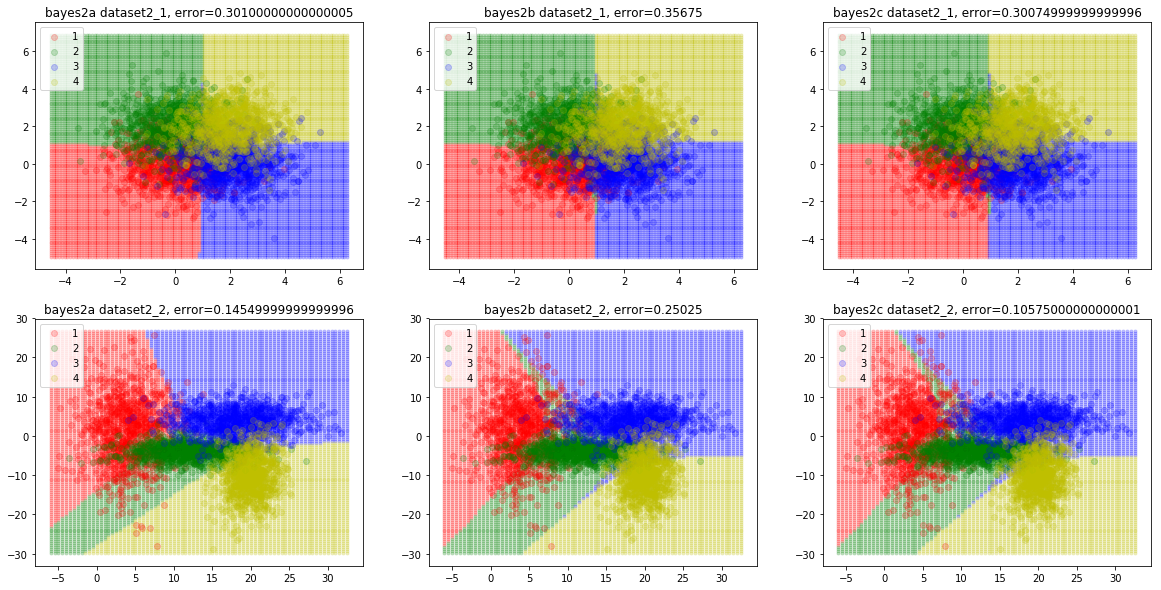

In [23]:
# # Cell type : CodeWrite
# # write the code for loading the data, running the three algos, and plotting here. 
# # (Use the functions written previously.)
# # Cell type : CodeWrite
# # write the code for loading the data, running the three algos, and plotting here. 
# # (Use the functions written previously.)

datasets_2 = np.array(['dataset2_1', 'dataset2_2'])

fig = plt.subplots(nrows=2, ncols=3,figsize=(20,10))
plots_pos = np.array([231,234])
for i in range(datasets_2.shape[0]):
    X_train = np.load(file='Archive/'+ datasets_2[i] +'/arr_0.npy')
    Y_train = np.load(file='Archive/'+ datasets_2[i] +'/arr_1.npy')

    X_test = np.load(file='Archive/'+ datasets_2[i] +'/arr_2.npy')
    Y_test = np.load(file='Archive/'+ datasets_2[i] +'/arr_3.npy')

    Y_pred_test_2a = Bayes2a(X_train, Y_train, X_test)
    
    error_rate = 1.0 - np.count_nonzero(Y_test == Y_pred_test_2a)/X_test.shape[0]
    print('bayes2a error rate' , error_rate)

    confusion_matrix = np.empty(shape=(5,5), dtype=int)
    for j in range(1,5):
        for k in range(1,5):
            confusion_matrix[j,k] = np.count_nonzero((Y_test == j)& (Y_pred_test_2a == k))

    print(datasets_2[i] + ' ,bayes2a' + ' ,confusin matrix \n', confusion_matrix[1:5, 1:5]) 
    
    ax1 = plt.subplot(plots_pos[i])
    plt.title('bayes2a ' + datasets_2[i] +', error=' + str(error_rate))
    
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    
    if i == 0:
        step_size = 0.1
    else:
        step_size = 0.5
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step_size),np.arange(y_min, y_max, step_size))
    x1_x2points = np.array(np.meshgrid(np.arange(x_min, x_max, step_size),np.arange(y_min, y_max, step_size))).T.reshape(-1,2)
    Y_pred_area = Bayes2a(X_train, Y_train, x1_x2points)
    ax1.scatter(x1_x2points[Y_pred_area == 1][:,0], x1_x2points[Y_pred_area == 1][:,1],
                    alpha=0.2, color='r', marker='.')
    ax1.scatter(x1_x2points[Y_pred_area == 2][:,0], x1_x2points[Y_pred_area == 2][:,1], 
                    alpha=0.2, color='g', marker='.')
    ax1.scatter(x1_x2points[Y_pred_area == 3][:,0], x1_x2points[Y_pred_area == 3][:,1],
                    alpha=0.2, color='b', marker='.')
    ax1.scatter(x1_x2points[Y_pred_area == 4][:,0], x1_x2points[Y_pred_area == 4][:,1], 
                    alpha=0.2, color='y', marker='.')



    ax1.scatter(X_train[Y_train == 1][:,0], X_train[Y_train == 1][:,1],
                    alpha=0.2, color='r', marker='o', label='1')
    ax1.scatter(X_train[Y_train == 2][:,0], X_train[Y_train == 2][:,1], 
                    alpha=0.2, color='g', marker='o', label='2')
    ax1.scatter(X_train[Y_train == 3][:,0], X_train[Y_train == 3][:,1],
                    alpha=0.2, color='b', marker='o', label='3')
    ax1.scatter(X_train[Y_train == 4][:,0], X_train[Y_train == 4][:,1], 
                    alpha=0.2, color='y', marker='o', label='4')
    ax1.legend(loc='upper left')


plots_pos = np.array([232,235])
for i in range(datasets_2.shape[0]):
    X_train = np.load(file='Archive/'+ datasets_2[i] +'/arr_0.npy')
    Y_train = np.load(file='Archive/'+ datasets_2[i] +'/arr_1.npy')

    X_test = np.load(file='Archive/'+ datasets_2[i] +'/arr_2.npy')
    Y_test = np.load(file='Archive/'+ datasets_2[i] +'/arr_3.npy')

    Y_pred_test_2b = Bayes2b(X_train, Y_train, X_test)
    
    error_rate = 1.0 - np.count_nonzero(Y_test == Y_pred_test_2b)/X_test.shape[0]
    print('bayes2b', error_rate)
    confusion_matrix = np.empty(shape=(5,5), dtype=int)
    for j in range(1,5):
        for k in range(1,5):
            confusion_matrix[j,k] = np.count_nonzero((Y_test == j)& (Y_pred_test_2b == k))

    print(datasets_2[i] + ' ,bayes2b' + ' ,confusin matrix \n', confusion_matrix[1:5, 1:5]) 
    

    ax1 = plt.subplot(plots_pos[i])
    plt.title('bayes2b ' + datasets_2[i] +', error=' + str(error_rate))

    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    
    if i == 0:
        step_size = 0.1
    else:
        step_size = 0.5
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step_size),np.arange(y_min, y_max, step_size))
    x1_x2points = np.array(np.meshgrid(np.arange(x_min, x_max, step_size),np.arange(y_min, y_max, step_size))).T.reshape(-1,2)
    Y_pred_area = Bayes2b(X_train, Y_train, x1_x2points)
    ax1.scatter(x1_x2points[Y_pred_area == 1][:,0], x1_x2points[Y_pred_area == 1][:,1],
                    alpha=0.2, color='r', marker='.')
    ax1.scatter(x1_x2points[Y_pred_area == 2][:,0], x1_x2points[Y_pred_area == 2][:,1], 
                    alpha=0.2, color='g', marker='.')
    ax1.scatter(x1_x2points[Y_pred_area == 3][:,0], x1_x2points[Y_pred_area == 3][:,1],
                    alpha=0.2, color='b', marker='.')
    ax1.scatter(x1_x2points[Y_pred_area == 4][:,0], x1_x2points[Y_pred_area == 4][:,1], 
                    alpha=0.2, color='y', marker='.')



    ax1.scatter(X_train[Y_train == 1][:,0], X_train[Y_train == 1][:,1],
                    alpha=0.2, color='r', marker='o', label='1')
    ax1.scatter(X_train[Y_train == 2][:,0], X_train[Y_train == 2][:,1], 
                    alpha=0.2, color='g', marker='o', label='2')
    ax1.scatter(X_train[Y_train == 3][:,0], X_train[Y_train == 3][:,1],
                    alpha=0.2, color='b', marker='o', label='3')
    ax1.scatter(X_train[Y_train == 4][:,0], X_train[Y_train == 4][:,1], 
                    alpha=0.2, color='y', marker='o', label='4')
    ax1.legend(loc='upper left')

plots_pos = np.array([233,236])
for i in range(datasets_2.shape[0]):
    X_train = np.load(file='Archive/'+ datasets_2[i] +'/arr_0.npy')
    Y_train = np.load(file='Archive/'+ datasets_2[i] +'/arr_1.npy')

    X_test = np.load(file='Archive/'+ datasets_2[i] +'/arr_2.npy')
    Y_test = np.load(file='Archive/'+ datasets_2[i] +'/arr_3.npy')

    Y_pred_test_2c = Bayes2c(X_train, Y_train, X_test)
    
    error_rate = 1.0 - np.count_nonzero(Y_test == Y_pred_test_2c)/X_test.shape[0]
    print('bayes2c', error_rate)
    confusion_matrix = np.empty(shape=(5,5), dtype=int)
    for j in range(1,5):
        for k in range(1,5):
            confusion_matrix[j,k] = np.count_nonzero((Y_test == j)& (Y_pred_test_2c == k))

    print(datasets_2[i] + ' ,bayes2c' + ' ,confusin matrix \n', confusion_matrix[1:5, 1:5]) 

    ax1 = plt.subplot(plots_pos[i])
    plt.title('bayes2c ' + datasets_2[i] +', error=' + str(error_rate))

    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    
    if i == 0:
        step_size = 0.1
    else:
        step_size = 0.5
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step_size),np.arange(y_min, y_max, step_size))
    x1_x2points = np.array(np.meshgrid(np.arange(x_min, x_max, step_size),np.arange(y_min, y_max, step_size))).T.reshape(-1,2)
    Y_pred_area = Bayes2b(X_train, Y_train, x1_x2points)
    ax1.scatter(x1_x2points[Y_pred_area == 1][:,0], x1_x2points[Y_pred_area == 1][:,1],
                    alpha=0.2, color='r', marker='.')
    ax1.scatter(x1_x2points[Y_pred_area == 2][:,0], x1_x2points[Y_pred_area == 2][:,1], 
                    alpha=0.2, color='g', marker='.')
    ax1.scatter(x1_x2points[Y_pred_area == 3][:,0], x1_x2points[Y_pred_area == 3][:,1],
                    alpha=0.2, color='b', marker='.')
    ax1.scatter(x1_x2points[Y_pred_area == 4][:,0], x1_x2points[Y_pred_area == 4][:,1], 
                    alpha=0.2, color='y', marker='.')



    ax1.scatter(X_train[Y_train == 1][:,0], X_train[Y_train == 1][:,1],
                    alpha=0.2, color='r', marker='o', label='1')
    ax1.scatter(X_train[Y_train == 2][:,0], X_train[Y_train == 2][:,1], 
                    alpha=0.2, color='g', marker='o', label='2')
    ax1.scatter(X_train[Y_train == 3][:,0], X_train[Y_train == 3][:,1],
                    alpha=0.2, color='b', marker='o', label='3')
    ax1.scatter(X_train[Y_train == 4][:,0], X_train[Y_train == 4][:,1], 
                    alpha=0.2, color='y', marker='o', label='4')
    ax1.legend(loc='upper left')




** Cell type : TextWrite ** 
(Write your observations and table of errors here)

- table showing expected loss of 3 classifier on 2 datasets

|    Null    | bayes2a | bayes2b | bayes2c |
|:----------:|:-------:|:-------:|:-------:|
| dataset2_1 |  0.301  |  0.356  |  0.300  |
| dataset2_2 |  0.145  |  0.250  |  0.105  |

- confusion matrix on **dataset2_1**

<table>
    <tr><th><center>Bayes2a</center> </th><th><center>Bayes2b</center></th><th><center>bayes2c</center></th></tr>
<tr>
<td>
    
| N=4000   | predicted 1 | predicted 2 | predicted 3 | predicted 4 |
|----------|-------------|-------------|-------------|-------------|
| Actual 1 | 633         | 219         | 136         | 12          |
| Actual 2 | 97          | 738         | 62          | 103         |
| Actual 3 | 86          | 49          | 770         | 95          |
| Actual 4 | 15          | 136         | 194         | 655         |


</td>

<td>

| N=4000   | predicted 1 | predicted 2 | predicted 3 | predicted 4 |
|----------|-------------|-------------|-------------|-------------|
| Actual 1 | 463         | 388         | 145         | 4          |
| Actual 2 | 43          | 791         | 113          | 53         |
| Actual 3 | 40 | 95 | 818 | 47    |
| Actual 4 | 4 |149 |346 |501|

</td>

<td>

| N=4000   | predicted 1 | predicted 2 | predicted 3 | predicted 4 |
|----------|-------------|-------------|-------------|-------------|
| Actual 1 | 633| 218 |138|  11|
| Actual 2 | 99 |742  |61 | 98|
| Actual 3 | 87 | 47| 772  |94|
| Actual 4 | 15 |134| 201| 650|

</td>
</tr> 
</table>

- confusion matrix on **dataset2_2**

<table>
    <tr><th><center>Bayes2a</center> </th><th><center>Bayes2b</center></th><th><center>bayes2c</center></th></tr>
<tr>
<td>
    
| N=4000   | predicted 1 | predicted 2 | predicted 3 | predicted 4 |
|----------|-------------|-------------|-------------|-------------|
| Actual 1 | 830| 150| 18| 2|
| Actual 2 | 93 |784 |46 |77|
| Actual 3 | 30 |61 |905 |4|
| Actual 4 | 0 |23 |78 |899|


</td>

<td>

| N=4000   | predicted 1 | predicted 2 | predicted 3 | predicted 4 |
|----------|-------------|-------------|-------------|-------------|
| Actual 1 | 675 |302 |23 |0|
| Actual 2 | 39 |749 |205| 7|
| Actual 3 | 7 |118 |875 |0|
| Actual 4 | 0 |3 |297 |700|

</td>

<td>

| N=4000   | predicted 1 | predicted 2 | predicted 3 | predicted 4 |
|----------|-------------|-------------|-------------|-------------|
| Actual 1 | 901 |80 |19 |0|
| Actual 2 | 64 |824 |47 |65|
| Actual 3 | 19 |31 |936 |14|
| Actual 4 | 0 |36 |48 |916|

</td>
</tr> 
</table>

**Cell type : TextRead **

# Problem 3 : Bias-Variance analysis in regression

Do bias variance analysis for the following setting: 

$X \sim Unif([-1,1]\times[-1,1])$

$Y=\exp(-4*||X-a||^2) + \exp(-4*||X-b||^2) + \exp(-4*||X-c||^2)$

where $a=[0.5,0.5], b=[-0.5,0.5], c=[0.5, -0.5]$.

Regularised Risk = $\frac{1}{m} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

Sample 50 (X,Y) points from above distribution, and do ridge regularised polynomial regression with degrees=[1,2,4,8,16] and regularisation parameters ($\lambda$) = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]. Repeat for 100 times, and estimate the bias and variance for all 30 algorithms. You may approximate the distribution over X by discretising the $[-1,1]\times[-1,1]$ space into 10000 points. (Both expectations over S and (x,y) are simply estimates due to the finiteness of our experiments and sample)
 
3a) For each of the 30 algorithms (corresponding to 5 degrees and 6 lambda values) analyse the contour plot of the estimated $f_S$ for 3 different training sets. And the average $g(x) = E_S [f_S(x)]$. Write one function for doing everything in the code cell below. 

3b) In the next text cell, give the Bias and Variance computed as a $5\times 6$ matrix, appropriately label the rows and columns. And give your conclusion in one or two sentences. 




In [ ]:
# Cell type : CodeWrite
# ******************************Author(rahul biswas) code Helper functions******************************************

#generates all term of so that sum of degree of components of x is equal to deg
#example deg = 2, x = [x1, x2] then x1^0 * x2^2, x1^1 * x2^1, x1^2 * x2^0
def phi_givendegree(deg_to_exand, x):
    #this will create empty array of shape (x.shape , 0)
    n = x.shape[0]
    
    #d the dimension of data x
    d = x.shape[1]
    all_terms = np.empty(shape=(n, 0))
    for i in range(deg_to_exand+1):
        all_terms = np.concatenate((all_terms, (x[:,0][:,None]**(np.abs(d-i) )* (x[:,1][:,None]**i))), axis=1)
        
    return all_terms
        
def basis_expansion_fun(deg, x):
    n = x.shape[0]
    phi = np.empty(shape=(n,0))
    
    for i in range(deg+1):
        phi = np.concatenate((phi, phi_givendegree(deg_to_exand=i, x=x)), axis=1)
        #print('i=',i, '\n',phi)
    
    return phi

def samples(sample_size=50):
    feature1 = np.random.uniform(low=-1.0, high=1.0, size=sample_size).reshape(sample_size,1)
    feature2 = np.random.uniform(low=-1.0, high=1.0, size=sample_size).reshape(sample_size,1)

    # print(feature1)
    # print(feature2)

    x = np.concatenate((feature1, feature2), axis=1)
    y = compute_y(x)
    
    return x,y

def compute_y(x):
    a = np.array([0.5,0.5])
    b = np.array([-0.5,0.5])
    c = np.array([0.5,-0.5])
    y = np.exp( -4*np.sum((x-a)**2, axis=1)) + np.exp( -4*np.sum((x-b)**2, axis=1)) + np.exp( -4*np.sum((x-c)**2, axis=1))
    
    return y



# ******************************************************************************************************************

def polynomial_regression_ridge_pred(X_test, wt_vector, degree=1):
    """ Give the value of the learned polynomial function, on test data.

    Arguments:
    X_test: numpy array of shape (n,d)
    wt_vec: numpy array of shape (d',)

    Returns:
    Y_test_pred : numpy array of shape (n,)
    
    """
    design_matrix = basis_expansion_fun(deg=degree, x=X_test)
    Y_predicted = np.dot(design_matrix, wt_vector)
    return Y_predicted    
    

    
    
def visualise_polynomial_2d(wt_vector, degree, title=""):

    X,Y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
    
    Z = np.zeros(X.shape)
    
    for i in range(Z.shape[0]):
        for j in range(Z.shape[1]):
            point = np.array([[X[i,j], Y[i,j]]])
#             print(point)
            Z[i,j] = polynomial_regression_ridge_pred(X_test=point, wt_vector=weig, degree=degree)

    plt.contourf(X,Y,Z,levels=np.linspace(0.,1.2 , 20))
    plt.title('learned function : degree= '+ str(degree)+ ' , reg_param=' + title)
    plt.colorbar()
    
    
    
    
def polynomial_regression_ridge_train(X_train, Y_train, degree=1, reg_param=0.01):
    """ Give best polynomial fitting data, based on empirical squared error minimisation.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: numpy array of shape (n,)

    Returns:
    w : numpy array of shape (d',) with appropriate d'
    
    """

    design_matrix = basis_expansion_fun(deg=degree, x=X_train)
    
    weight = (1/2)*X_train.shape[0]*reg_param*np.identity(n= design_matrix.shape[1]) + np.dot(design_matrix.T, design_matrix)
    weight = np.linalg.pinv(weight)
    weight = np.dot(weight, np.dot(design_matrix.T, Y_train))

    return weight    
    
    

    
    
def compute_BV_error_sample_plot(degree, reg_param, num_training_samples=50):
    
    """Write code for generating data, fitting polynomial for given degree and reg_param. 
    Use num_training_samples samples for training.
        
    Compute the $f_S$ of 100 runs. 

    Plot 3 examples of learned function to illustrate how learned function varies 
    with different training samples. Also plot the average $f_S$ of all 100 runs.
    
    In total 4 subplots in one plot with appropriate title including degree and lambda value.
    
    Fill code to compute bias and variance, and average mean square error using the computed 100 $f_S$ functions.
    
    All contourplots are to be drawn with levels=np.linspace(0,1.2,20)
    
    Also return bias, variance, mean squared error. """
    
    num_of_runs = 100
    #find 100 weights for diff num_training_samples
    #d' = (k+d)C_d 
    d_new = int(((degree+2)*(degree + 1))/2)
    weights = np.empty(shape=(num_of_runs,d_new))
    for i in range(num_of_runs):
        x, y = samples(num_training_samples)
        weights[i] = np.array([polynomial_regression_ridge_train(x, y, degree=degree, reg_param=reg_param)])
        
    
    x1_x2points = np.array(np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))).T.reshape(-1,2)
    
    MSE_error = 0.0
    bias_square_error = 0.0
    variance_error = 0.0
    
    variance_error_ary = np.zeros(shape=(x1_x2points.shape[0],))
    mse_error_ary = np.zeros(shape=(x1_x2points.shape[0],))
    
    
    true_func = compute_y(x1_x2points)
    
    avg_weight = np.mean(weights, axis=0)
    
    avg_func = polynomial_regression_ridge_pred(X_test=x1_x2points, wt_vector=avg_weight, degree=degree)
    
    bias_square_error = np.sum((1/avg_func.shape[0])*((avg_func - true_func)**2),axis=0)
    
    #compute variance error and mse in same loop
    for i in range(num_of_runs):
        func_sample_i = polynomial_regression_ridge_pred(x1_x2points, weights[i],degree)
        mse_error_ary += (func_sample_i - true_func)**2
        variance_error_ary +=  (func_sample_i - avg_func)**2
    
    variance_error = (1/variance_error_ary.shape[0])*(np.sum((1/num_of_runs)*variance_error_ary, axis=0))
    MSE_error = np.sum((1/num_of_runs)*mse_error_ary,axis=0)
    
    
    return bias_square_error**(1/2), variance_error, MSE_error
    #print('bias error', bias_square_error, 'variance err', variance_error , 'MSE error', MSE_error)
    
    
    
    


for degree in [1,2,4,8,16]:
    for reg_param in [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]:
        plt.figure()
        b,v,e = compute_BV_error_sample_plot(degree, reg_param)
        print('================================')
        print('Degree= '+str(degree)+' lambda= '+str(reg_param))
        print('Bias = '+str(b))
        print('Variance = '+str(v))
        print('MSE = '+str(e))

# for degree in [1,2]:
#     for reg_param in [1e-9, 1e-1, 1e1]:
#         plt.figure()
#         b,v,e = compute_BV_error_sample_plot(degree, reg_param)
#         print('================================')
#         print('Degree= '+str(degree)+' lambda= '+str(reg_param))
#         print('Bias = '+str(b))
#         print('Variance = '+str(v))
#         print('MSE = '+str(e))
        

In [ ]:
# Cell type: convenience



** Cell type: TextWrite **
Give the biases and variances computed for the various algorithms with various degrees and lambdas and summarise your findings.



** Cell type : TextRead **

# Problem 4 : Analyse overfitting and underfitting in Regression


Consider the 2-dimensional regression dataset "dateset4_1.npz". Do polynomial ridge regression for degrees = [1,2,4,8,16], and regularisation parameter $\lambda$ = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]. Do all the above by using three different subset sizes of the training set : 50, 100, 200 and 1000. (Just take the first few samples of X_train and Y_train.)

Regularised Risk = $\frac{1}{m} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

The lambda value is given by the regularisation parameter.

In the next codewrite cell, for each training set size compute how the train and test squared error varies with degree and regularisation parameter. Compute the "best" degree and regularisation parameter based on the test squared error. Give a contour plot of the learned function for the chosen hyper-parameters, with appropriate title including the hyperparameters. Total number of figures = 4 (one for each training set size.)

Summarise your findings in the next tex cell in a few sentences. And reproduce the tables showing train and test error for various training sizes, with appropriate row and column names.




In [ ]:
# Cell type : CodeWrite 

# ******************************Author(rahul biswas) code Helper functions******************************************

#generates all term of so that sum of degree of components of x is equal to deg
#example deg = 2, x = [x1, x2] then x1^0 * x2^2, x1^1 * x2^1, x1^2 * x2^0
def phi_givendegree(deg_to_exand, x):
    #this will create empty array of shape (x.shape , 0)
    n = x.shape[0]
    
    #d the dimension of data x
    d = x.shape[1]
    all_terms = np.empty(shape=(n, 0))
    for i in range(deg_to_exand+1):
        all_terms = np.concatenate((all_terms, (x[:,0][:,None]**(np.abs(d-i) )* (x[:,1][:,None]**i))), axis=1)
        
    return all_terms
        
def basis_expansion_fun(deg, x):
    n = x.shape[0]
    phi = np.empty(shape=(n,0))
    
    for i in range(deg+1):
        phi = np.concatenate((phi, phi_givendegree(deg_to_exand=i, x=x)), axis=1)
    
    return phi


def polynomial_regression_ridge_pred(X_test, wt_vector, degree=1):
    """ Give the value of the learned polynomial function, on test data.

    Arguments:
    X_test: numpy array of shape (n,d)
    wt_vec: numpy array of shape (d',)

    Returns:
    Y_test_pred : numpy array of shape (n,)
    
    """
    design_matrix = basis_expansion_fun(deg=degree, x=X_test)
    Y_predicted = np.dot(design_matrix, wt_vector)
    return Y_predicted    
    

    
    
def visualise_polynomial_2d(wt_vector, degree, title=""):

    X,Y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
    
    Z = np.zeros(X.shape)
    
    for i in range(Z.shape[0]):
        for j in range(Z.shape[1]):
            point = np.array([[X[i,j], Y[i,j]]])
            Z[i,j] = polynomial_regression_ridge_pred(X_test=point, wt_vector=wt_vector, degree=degree)

    plt.contourf(X,Y,Z,levels=np.linspace(0.,1.2 , 20))
    plt.title('learned function : degree= '+ str(degree)+ ' , reg_param=' + title)
    plt.colorbar()
    
    
    
    
def polynomial_regression_ridge_train(X_train, Y_train, degree=1, reg_param=0.01):
    """ Give best polynomial fitting data, based on empirical squared error minimisation.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: numpy array of shape (n,)

    Returns:
    w : numpy array of shape (d',) with appropriate d'
    
    """

    design_matrix = basis_expansion_fun(deg=degree, x=X_train)
    
    weight = (1/2)*X_train.shape[0]*reg_param*np.identity(n= design_matrix.shape[1]) + np.dot(design_matrix.T, design_matrix)
    weight = np.linalg.pinv(weight)
    weight = np.dot(weight, np.dot(design_matrix.T, Y_train))

    return weight    
    
    

    
    
def compute_train_test_error_sample_plot(X_train, Y_train, X_test,Y_test,degree, reg_param, num_training_samples=50):
    
    """Write code for generating data, fitting polynomial for given degree and reg_param. 
    Use num_training_samples samples for training.
    """
    
    num_of_runs = 3
    d_new = int(((degree+2)*(degree + 1))/2)
    weights = np.empty(shape=(num_of_runs,d_new))
    for i in range(num_of_runs):
        #2 samples from train data num_trainsamples
        indices = np.random.choice(np.arange(X_train.shape[0]), size=num_training_samples)
        x, y = X_train[indices], Y_train[indices]
        weights[i] = np.array([polynomial_regression_ridge_train(x, y, degree=degree, reg_param=reg_param)])
        
    #avg weight
    avg_weight = np.mean(weights, axis=0)
    
    #using avgweight, predict train points and test points
    train_predict = polynomial_regression_ridge_pred(X_test=X_train,wt_vector=avg_weight, degree=degree)
    test_predict  = polynomial_regression_ridge_pred(X_test=X_test, wt_vector=avg_weight, degree=degree)
    
    #rerurn train error, test error
    train_err = np.sum((train_predict - Y_train)**2)
    test_err  = np.sum((test_predict - Y_test)**2)
    
    return avg_weight, train_err, test_err
    
    

X_train = np.load('Archive/dataset4_1/arr_0.npy')
Y_train = np.load('Archive/dataset4_1/arr_1.npy')

X_test = np.load('Archive/dataset4_1/arr_2.npy')
Y_test = np.load('Archive/dataset4_1/arr_3.npy')

min_test_err = float("inf")
best_reg_param = float(1.0)
best_degree = 1
best_weight = np.array([])

result_table = np.empty(shape=(4*5*6, 5))

fig = plt.subplots(nrows=2, ncols=2,figsize=(20,20))
plots_pos = np.array([221,222,223, 224])

i = 0
j=0
for num_training_samples in [50,100, 200,1000]:
    for degree in [1,2,4,8,16]:
        for reg_param in [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]:
            avg_weight, tr_err, ts_err = compute_train_test_error_sample_plot(X_train, Y_train, X_test, Y_test, degree, reg_param, num_training_samples )
            result_table[i] = np.array([num_training_samples, degree, reg_param, tr_err, ts_err])
            if ts_err < min_test_err:
                min_test_err = ts_err
                best_reg_param = reg_param
                best_degree = degree
                best_weight = avg_weight
            
    ax1 = plt.subplot(plots_pos[i])
    i += 1
                                
    visualise_polynomial_2d(best_weight, best_degree, str(best_reg_param) + ', samples =' + str(num_training_samples))


** Cell type : TextWrite **